In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_df = pd.read_csv('telecom_churn_clean.csv')
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 17)
knn.fit(X_train, y_train)
y_pred  = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[564  18]
 [ 57  28]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       582
           1       0.61      0.33      0.43        85

    accuracy                           0.89       667
   macro avg       0.76      0.65      0.68       667
weighted avg       0.87      0.89      0.87       667



### Логистическая регрессия

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [23]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs)

[0.02228464 0.30105263 0.14014259 0.06545921 0.29172325 0.14866627
 0.02427082 0.07874497 0.08705098 0.08608323 0.04552747 0.08890001
 0.15769903 0.07946781 0.17100507 0.09814708 0.07966261 0.04248416
 0.16201644 0.3628597  0.20203227 0.01802657 0.09423448 0.06366343
 0.17085897 0.31412537 0.0444312  0.07015963 0.07826245 0.11981651
 0.1763445  0.3872476  0.2639826  0.0478503  0.28359086 0.15339988
 0.18546597 0.13946779 0.09129984 0.40748982 0.21128878 0.08597504
 0.05705303 0.21668059 0.04128575 0.31597423 0.24008567 0.0576847
 0.08893182 0.08004556 0.05335587 0.34208751 0.22947405 0.08340489
 0.06081206 0.12248342 0.11054009 0.01882705 0.16005387 0.19090197
 0.11319081 0.05866832 0.22901128 0.19225007 0.16417397 0.18136843
 0.08281239 0.23980591 0.22449336 0.22442757 0.09286028 0.18216535
 0.09383845 0.0760161  0.0737285  0.25067605 0.22522788 0.12880082
 0.29645929 0.07776455 0.11231601 0.20973492 0.29734496 0.16134838
 0.28538218 0.22304366 0.15747754 0.09903383 0.09046458 0.10145

### ROC-кривая

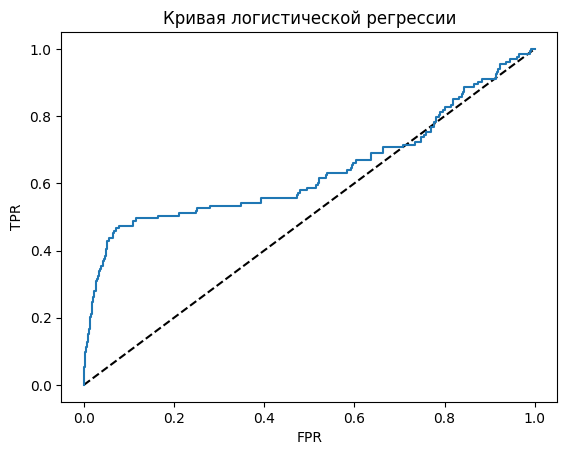

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Кривая логистической регрессии')
plt.show()


In [28]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.636842972483111
